In [12]:
import numpy as np

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

In [18]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

print(train_input.shape, test_input.shape)

(42,) (14,)


In [19]:
train_input=train_input.reshape(-1, 1)
test_input=test_input.reshape(-1, 1)

In [7]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [8]:
print(knr.predict([[42]]))
print(knr.predict([[43]]))
print(knr.predict([[50]]))
print(knr.predict([[100]]))

[1066.66666667]
[1033.33333333]
[1033.33333333]
[1033.33333333]


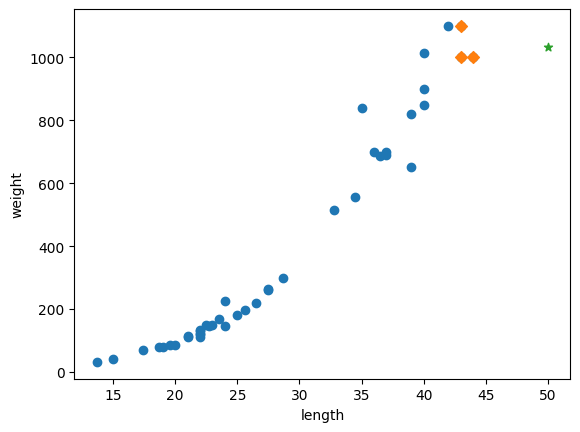

In [11]:
distances, indexes = knr.kneighbors([[50]])

import matplotlib.pyplot as plt
plt.scatter(train_input, train_target)
plt.xlabel("length")
plt.ylabel("weight")
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
plt.scatter(50, 1033.33333333, marker="*")
plt.show()

In [55]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(train_input, train_target)

LinearRegression()

In [56]:
print(lr.predict([[42]]))
print(lr.predict([[43]]))
print(lr.predict([[50]]))
print(lr.predict([[100]]))

[929.70144352]
[968.71858848]
[1241.83860323]
[3192.69585141]


[39.01714496] -709.0186449535477


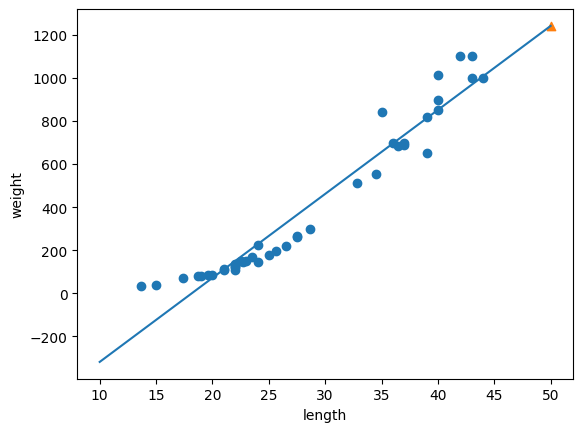

In [58]:
A=lr.coef_
B=lr.intercept_
print(lr.coef_, lr.intercept_)

plt.scatter(train_input, train_target)
plt.plot([10, 50], [10*A+B, 50*A+B])
plt.scatter(50, 1241.83860323, marker="^")
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [39]:
lr.predict([[50]])==A*50+B
lr.predict([[15]])

array([-123.7614705])

In [87]:
# 다항회귀 모델의 그래프 그리기
train_poly=np.column_stack((train_input**2,train_input))
#train_poly=np.column_stack((train_input**3, train_input**2,train_input))
lr=LinearRegression()
lr.fit(train_poly, train_target)
#lr.predict([[50**2, 50]])

LinearRegression()

In [88]:
# 다항식: weight = (A * (length)^2) + (B * length) + C
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278264


In [91]:
A=lr.coef_[0]
B=lr.coef_[1]
#C=lr.coef_[2]
C=lr.intercept_
print(lr.coef_)
print(C)

[  1.01433211 -21.55792498]
116.05021078278264


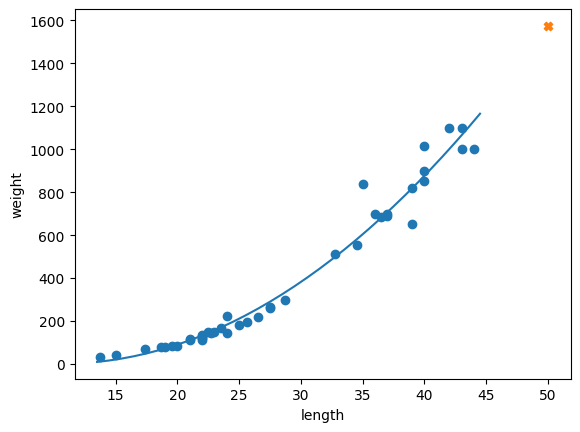

In [95]:
point=np.arange(13.5, 45)
plt.scatter(train_input, train_target)
plt.xlabel("length")
plt.ylabel("weight")
#plt.plot(point, A*point**3+B*point**2+C*point+D)
plt.plot(point, A*point**2+B*point+C)
plt.scatter(50, 1574, marker='X')
# point = length
# Ax^2+Bx+C = weight
plt.show()

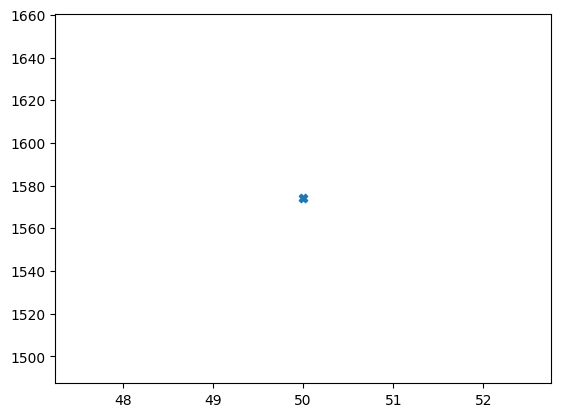